In [1]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.7MB/s 
     |████████████████████████████████| 890kB 10.2MB/s 
     |████████████████████████████████| 3.0MB 21.8MB/s 
     |████████████████████████████████| 1.1MB 32.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=1c0f23baa2839e8fa0a50fc6c7fcaabb2c1f3eab45ffdebfac4ec3eccd974ba3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
from transformers import DistilBertTokenizer,DistilBertConfig, RobertaConfig, RobertaTokenizer, TFRobertaModel, TFDistilBertModel 
#from transformers import *
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers
from keras import regularizers 
from keras.layers import Dense, Input , Dropout 
from keras.layers import Flatten 
from keras.layers import concatenate 
from keras.layers.embeddings import Embedding 
from keras.models import Model 
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, TimeDistributed,Bidirectional
from keras.preprocessing.sequence import pad_sequences

print('TF version',tf.__version__)

TF version 2.3.0


In [3]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [4]:
train_data=pd.read_csv('train_twitter.csv').fillna('')
train_data.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [5]:
# We are trying to remove whitespace because it may produce different encodings for same words
def spaces_text(df):
  sent=df['text'].strip()
  return sent

def spaces_st(df):
  sent1=df['selected_text'].strip()  
  return sent1

In [6]:
train_data['text']=train_data.apply(spaces_text,axis=1)
train_data['selected_text']=train_data.apply(spaces_st,axis=1)

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(train_data,test_size=0.2,stratify=train_data['sentiment'])
print(train.shape)
print(test.shape)

(21984, 4)
(5497, 4)


In [8]:
train_copy=train.copy() 
train_copy=train_copy.reset_index(drop=True) 
train_copy.head(2)

,textID,text,selected_text,sentiment
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral


In [9]:
test_copy=test.copy() 
test_copy=test_copy.reset_index(drop=True) 
test_copy.head(2)

,textID,text,selected_text,sentiment
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive


In [10]:
def token(text,tokenizer):
  inputs=[]
  masks=[]
  
  for i in range(text.shape[0]):
    tok=tokenizer(text[i])
    inputs.append(tok['input_ids'])
    masks.append(tok['attention_mask'])
    
  return np.array(inputs),np.array(masks)

In [11]:
tr_feat=token(train_copy.text,tokenizer)


In [12]:
ts_feat=token(test_copy.text,tokenizer)
inputs_ts=ts_feat[0]
masks_ts=ts_feat[1]

In [13]:
inputs_ts

array([list([0, 1215, 417, 38, 64, 12905, 90, 1217, 932, 6, 14651, 4, 1491, 129, 524, 38, 4968, 6, 38, 64, 12905, 90, 190, 1166, 5, 31095, 317, 4, 2]),
       list([0, 29334, 9993, 47146, 3935, 328, 205, 662, 7409, 1245, 328, 164, 7, 173, 23, 112, 98, 240, 7, 489, 16404, 8, 8143, 42, 3269, 328, 517, 66, 11, 326, 10877, 65, 183, 2]),
       list([0, 1638, 857, 939, 240, 7, 465, 277, 169, 172, 29784, 329, 2]),
       ...,
       list([0, 18, 658, 338, 1720, 108, 3795, 19, 10, 8492, 8, 10, 1455, 6, 142, 24, 12905, 29, 985, 12905, 29, 183, 328, 1437, 4252, 56, 2162, 7716, 4, 4832, 8061, 2]),
       list([0, 2362, 6, 21958, 6, 51, 222, 45, 328, 939, 21, 22431, 77, 939, 13356, 62, 42, 662, 4, 2]),
       list([0, 734, 8, 24, 29667, 4056, 9470, 14989, 29, 274, 5944, 1009, 34727, 30986, 3226, 53, 38, 29667, 4056, 9470, 14989, 119, 98, 3610, 23, 173, 452, 38, 351, 29667, 4056, 9470, 14989, 90, 120, 932, 626, 2])],
      dtype=object)

In [14]:
inputs=tr_feat[0]
masks=tr_feat[1]
inputs

array([list([0, 7333, 18698, 127, 865, 15, 5, 35572, 6, 24, 15774, 2]),
       list([0, 100, 12905, 119, 164, 7, 860, 359, 120, 103, 3581, 4, 38, 300, 173, 2260, 70, 183, 359, 38, 12905, 119, 1058, 13, 22428, 67, 4, 272, 5112, 4783, 33175, 11398, 8956, 15, 9124, 4, 226, 1916, 139, 4, 14159, 50, 486, 2]),
       list([0, 100, 794, 110, 3545, 10, 891, 9, 688, 536, 14, 56, 14, 15493, 6, 98, 770, 7, 5042, 187, 38, 524, 10, 1307, 8703, 2378, 2]),
       ...,
       list([0, 10926, 419, 98, 15158, 8, 19957, 196, 5, 512, 4, 38, 12905, 119, 686, 5, 10689, 206, 38, 12905, 119, 7758, 6, 38, 10397, 24, 823, 358, 186, 4, 2]),
       list([0, 771, 32708, 31, 2941, 4932, 13848, 7, 20804, 21457, 1437, 1437, 2054, 640, 17137, 405, 19017, 4, 175, 73, 306, 267, 506, 306, 330, 2]),
       list([0, 21136, 35666, 1053, 7, 70, 35666, 358, 147, 2])],
      dtype=object)

In [15]:
tr_feat[0].shape

(21984,)

In [16]:
tr_feat[0]

array([list([0, 7333, 18698, 127, 865, 15, 5, 35572, 6, 24, 15774, 2]),
       list([0, 100, 12905, 119, 164, 7, 860, 359, 120, 103, 3581, 4, 38, 300, 173, 2260, 70, 183, 359, 38, 12905, 119, 1058, 13, 22428, 67, 4, 272, 5112, 4783, 33175, 11398, 8956, 15, 9124, 4, 226, 1916, 139, 4, 14159, 50, 486, 2]),
       list([0, 100, 794, 110, 3545, 10, 891, 9, 688, 536, 14, 56, 14, 15493, 6, 98, 770, 7, 5042, 187, 38, 524, 10, 1307, 8703, 2378, 2]),
       ...,
       list([0, 10926, 419, 98, 15158, 8, 19957, 196, 5, 512, 4, 38, 12905, 119, 686, 5, 10689, 206, 38, 12905, 119, 7758, 6, 38, 10397, 24, 823, 358, 186, 4, 2]),
       list([0, 771, 32708, 31, 2941, 4932, 13848, 7, 20804, 21457, 1437, 1437, 2054, 640, 17137, 405, 19017, 4, 175, 73, 306, 267, 506, 306, 330, 2]),
       list([0, 21136, 35666, 1053, 7, 70, 35666, 358, 147, 2])],
      dtype=object)

In [18]:
print(tokenizer.decode(2))
tokenizer.decode(0)

</s>


'<s>'

In [19]:
print(tokenizer.encode(' positive'))
print(tokenizer.encode(' negative'))
print(tokenizer.encode(' neutral'))

[0, 1313, 2]
[0, 2430, 2]
[0, 7974, 2]


<b> Ids for sentiments </b> <br>
Positive ----> 1313 <br>
Negative ----> 2430 <br>
Neutral  ----> 7974 <br>

RoBERTa doesn’t have token_type_ids, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token 

In [20]:
# Adding these ids to the input_ids
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}

In [21]:
type(sentiment_id['positive'])

int

In [22]:
'''
for i in range(train_copy.shape[0]):
  masks[i]=masks[i] + [1]*3
  inputs[i]=inputs[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]
'''

"\nfor i in range(train_copy.shape[0]):\n  masks[i]=masks[i] + [1]*3\n  inputs[i]=inputs[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]\n"

In [23]:
len(inputs[3])

19

In [24]:
len(masks[3])

19

In [25]:
'''
for i in range(test_copy.shape[0]):
  inputs_ts[i]=inputs_ts[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]
  masks_ts[i]=masks_ts[i] + [1]*3
'''

"\nfor i in range(test_copy.shape[0]):\n  inputs_ts[i]=inputs_ts[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]\n  masks_ts[i]=masks_ts[i] + [1]*3\n"

In [26]:
inputs_ts

array([list([0, 1215, 417, 38, 64, 12905, 90, 1217, 932, 6, 14651, 4, 1491, 129, 524, 38, 4968, 6, 38, 64, 12905, 90, 190, 1166, 5, 31095, 317, 4, 2]),
       list([0, 29334, 9993, 47146, 3935, 328, 205, 662, 7409, 1245, 328, 164, 7, 173, 23, 112, 98, 240, 7, 489, 16404, 8, 8143, 42, 3269, 328, 517, 66, 11, 326, 10877, 65, 183, 2]),
       list([0, 1638, 857, 939, 240, 7, 465, 277, 169, 172, 29784, 329, 2]),
       ...,
       list([0, 18, 658, 338, 1720, 108, 3795, 19, 10, 8492, 8, 10, 1455, 6, 142, 24, 12905, 29, 985, 12905, 29, 183, 328, 1437, 4252, 56, 2162, 7716, 4, 4832, 8061, 2]),
       list([0, 2362, 6, 21958, 6, 51, 222, 45, 328, 939, 21, 22431, 77, 939, 13356, 62, 42, 662, 4, 2]),
       list([0, 734, 8, 24, 29667, 4056, 9470, 14989, 29, 274, 5944, 1009, 34727, 30986, 3226, 53, 38, 29667, 4056, 9470, 14989, 119, 98, 3610, 23, 173, 452, 38, 351, 29667, 4056, 9470, 14989, 90, 120, 932, 626, 2])],
      dtype=object)

In [27]:
# Paddig them to a fixed size
input_ids_tr=pad_sequences(inputs,padding='post',maxlen=96,value=1)
print(input_ids_tr.shape)
input_ids_tr

(21984, 96)


array([[    0,  7333, 18698, ...,     1,     1,     1],
       [    0,   100, 12905, ...,     1,     1,     1],
       [    0,   100,   794, ...,     1,     1,     1],
       ...,
       [    0, 10926,   419, ...,     1,     1,     1],
       [    0,   771, 32708, ...,     1,     1,     1],
       [    0, 21136, 35666, ...,     1,     1,     1]], dtype=int32)

In [28]:
# Paddig them to a fixed size
input_ids_ts=pad_sequences(inputs_ts,padding='post',maxlen=96,value=1)
print(input_ids_ts.shape)
input_ids_ts

(5497, 96)


array([[    0,  1215,   417, ...,     1,     1,     1],
       [    0, 29334,  9993, ...,     1,     1,     1],
       [    0,  1638,   857, ...,     1,     1,     1],
       ...,
       [    0,    18,   658, ...,     1,     1,     1],
       [    0,  2362,     6, ...,     1,     1,     1],
       [    0,   734,     8, ...,     1,     1,     1]], dtype=int32)

In [29]:
attention_masks_tr=pad_sequences(masks,padding='post',maxlen=96)
print(attention_masks_tr.shape)
attention_masks_tr

(21984, 96)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [30]:
attention_masks_ts=pad_sequences(masks_ts,padding='post',maxlen=96)
print(attention_masks_ts.shape)
attention_masks_ts

(5497, 96)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [31]:
train_copy.head()

,textID,text,selected_text,sentiment
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral
4,dd1b429fc1,i`m not ready for tomorrow`s competition!,i`m not ready for tomorrow`s competition!,neutral


In [32]:
def labels(df):  
  string=df['text']  
  words=list(string.split())  
  l=len(words)  
  label=np.zeros(l)  
  label.astype(np.bool)  
  target=df['selected_text']  
  st_words=list(target.split())  
  for i in st_words:    
    try:      
      num=words.index(i)      
      label[num]=1    
    except ValueError:            
      pass    
  return label
train_copy['labels']=train_copy.apply(labels,axis=1)  
test_copy['labels']=test_copy.apply(labels,axis=1)  
train_copy.head(2)

,textID,text,selected_text,sentiment,labels
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [33]:
test_copy.head()

,textID,text,selected_text,sentiment,labels
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]"
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."


In [34]:
test_copy['labels'][0]

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [35]:
from keras.preprocessing.sequence import pad_sequences
y_pad_ts=pad_sequences(test_copy['labels'],maxlen=96, padding='post',value=2) 
#y_ts_pad=pad_sequences(Y_test,maxlen=50, padding='post') 
print(y_pad_ts.shape) 
print(type(y_pad_ts)) 
print(y_pad_ts)

(5497, 96)
<class 'numpy.ndarray'>
[[0 1 0 ... 2 2 2]
 [0 1 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


In [36]:
y_pad_tr=pad_sequences(train_copy['labels'],maxlen=96, padding='post',value=2) 
#y_ts_pad=pad_sequences(Y_test,maxlen=50, padding='post') 
print(y_pad_tr.shape) 
print(type(y_pad_tr)) 
print(y_pad_tr)

(21984, 96)
<class 'numpy.ndarray'>
[[0 0 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 0 0 ... 2 2 2]]


In [37]:
start_tr=np.zeros((len(y_pad_tr),96))
for i in range(y_pad_tr.shape[0]):
  for j in range(96):
    if(y_pad_tr[i][j]==1):
      start_tr[i][j]=1
      break

In [38]:
start_ts=np.zeros((len(y_pad_ts),96))
for i in range(y_pad_ts.shape[0]):
  for j in range(96):
    if(y_pad_ts[i][j]==1):
      start_ts[i][j]=1
      break

In [39]:
end_tr=np.zeros((len(y_pad_tr),96))
for i in range(y_pad_tr.shape[0]):
  for j in range(95,-1,-1):
    if(y_pad_tr[i][j]==1):
      end_tr[i][j]=1
      break

In [40]:
end_ts=np.zeros((len(y_pad_ts),96))
for i in range(y_pad_ts.shape[0]):
  for j in range(95,-1,-1):
    if(y_pad_ts[i][j]==1):
      end_ts[i][j]=1
      break

In [41]:
train_copy.labels[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
start_tr[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
end_tr[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [45]:
start_tr.shape

(21984, 96)

In [46]:
y_pad_tr.shape

(21984, 96)

In [47]:
Y_tr=np.reshape(y_pad_tr,(-1,96,1)) 
print(Y_tr.shape) 
Y_ts=np.reshape(y_pad_ts,(-1,96,1)) 
print(Y_ts.shape)

(21984, 96, 1)
(5497, 96, 1)


In [48]:
def maskedLoss(y_true, y_pred):    
  loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction='none')
 #getting mask value    
  mask = tf.math.logical_not(tf.math.equal(y_true, 2))
 
 #calculating the loss    
  loss_ = loss_function(y_true, y_pred)    
  loss_=tf.reshape(loss_,(-1,96,1))    
 #print(loss_)    
 #print(loss_.shape)
 
 #converting mask dtype to loss_ dtype    
  mask = tf.cast(mask, dtype='int32')
 
 #applying the mask to loss    
  loss_ = loss_*mask    
 #print(loss_)
 
 #getting mean over all the values    
  loss_ = tf.reduce_sum(loss_)/tf.reduce_sum(mask)    
  return loss_


In [49]:
def build_model():
    MAX_LEN=96
    ids = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)

    bert_model = TFRobertaModel.from_pretrained('roberta-base')
    roberta = bert_model(ids,attention_mask=att)
    
    drop1 = tf.keras.layers.Dropout(0.1)(roberta[0]) 
    conv1 = tf.keras.layers.Conv1D(1,1)(drop1)
    flat1 = tf.keras.layers.Flatten()(conv1)
    out1 = tf.keras.layers.Activation('softmax')(flat1)
    
    drop2 = tf.keras.layers.Dropout(0.1)(roberta[0]) 
    conv2 = tf.keras.layers.Conv1D(1,1)(drop2)
    flat2 = tf.keras.layers.Flatten()(conv2)
    out2 = tf.keras.layers.Activation('softmax')(flat2)
    
    model = tf.keras.models.Model(inputs=[ids, att,], outputs=[out1,out2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [51]:
model=build_model()
model.summary()

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 96)]         0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo ((None, 96, 768), (N 124645632   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dropout_74 (Dropout)            (None, 96, 768)      0           tf_roberta_model_1[0][

In [52]:
#model=build_model1()
#model.summary()

In [53]:
#from keras.utils import plot_model
#plot_model(model, show_shapes=True,show_layer_names=True, to_file='model1.png')

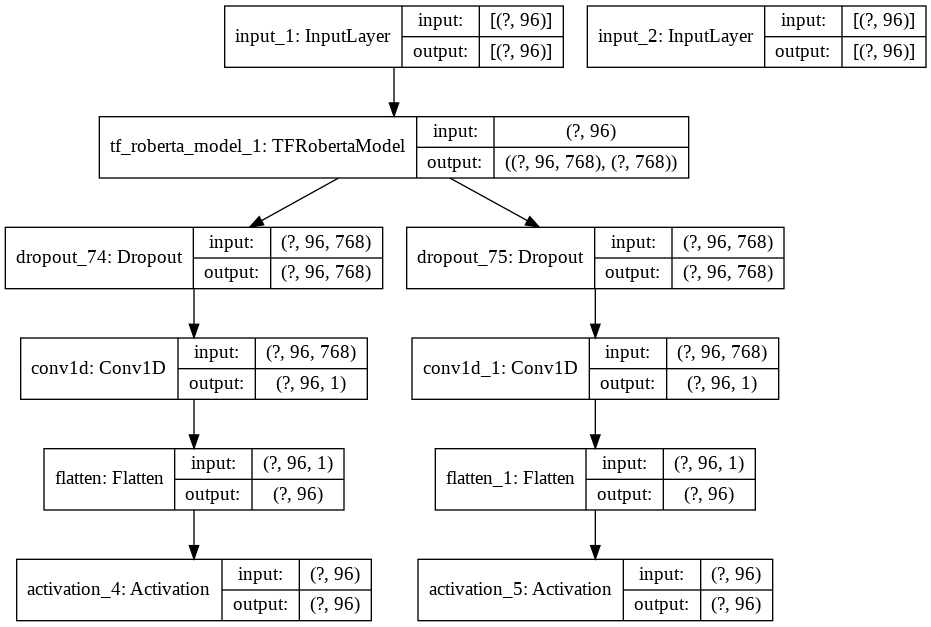

In [54]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,show_layer_names=True, to_file='model1.png')

In [55]:
input_ids_tr

array([[    0,  7333, 18698, ...,     1,     1,     1],
       [    0,   100, 12905, ...,     1,     1,     1],
       [    0,   100,   794, ...,     1,     1,     1],
       ...,
       [    0, 10926,   419, ...,     1,     1,     1],
       [    0,   771, 32708, ...,     1,     1,     1],
       [    0, 21136, 35666, ...,     1,     1,     1]], dtype=int32)

In [56]:
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import os
import datetime
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1) 
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1) 
logdir = os.path.join("model", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 
tb1 = TensorBoard(log_dir=logdir)

In [57]:
y_pad_tr

array([[0, 0, 0, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 0, 0, ..., 2, 2, 2]], dtype=int32)

In [58]:
hist = model.fit([input_ids_tr,attention_masks_tr,],[start_tr,end_tr],
                validation_data = ([input_ids_ts, attention_masks_ts], [start_ts,end_ts]),
                epochs=3, batch_size=32,verbose=1,callbacks=[es,mc,tb1])

Epoch 1/3
  1/687 [..............................] - ETA: 0s - loss: 8.9690 - activation_4_loss: 4.5196 - activation_5_loss: 4.4494 - activation_4_accuracy: 0.0000e+00 - activation_5_accuracy: 0.0938WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
687/687 [==============================] - 1056s 2s/step - loss: 3.5753 - activation_4_loss: 1.4912 - activation_5_loss: 2.0841 - activation_4_accuracy: 0.5849 - activation_5_accuracy: 0.2870 - val_loss: 2.6575 - val_activation_4_loss: 1.1787 - val_activation_5_loss: 1.4788 - val_activation_4_accuracy: 0.6263 - val_activation_5_accuracy: 0.4903
Epoch 2/3
687/687 [==============================] - 1052s 2s/step - loss: 2.6662 - activation_4_loss: 1.2036 - activation_5_loss: 1.4626 - activation_4_accuracy: 0.6146 - acti

In [59]:
#hist = model.fit([input_ids_tr,attention_masks_tr,],y_pad_tr,
#                validation_data = ([input_ids_ts, attention_masks_ts], y_pad_ts),
#                epochs=3, batch_size=96,verbose=1,callbacks=[es])

In [60]:
pred=model.predict([input_ids_ts,attention_masks_ts])

In [61]:
print(len(pred))
start=pred[0]
end=pred[1]
print(start.shape)
print(end.shape)

2
(5497, 96)
(5497, 96)


In [62]:
start

array([[3.36584926e-01, 5.27576745e-01, 2.39785872e-02, ...,
        5.88283801e-05, 5.88283801e-05, 5.88283801e-05],
       [8.56858194e-02, 8.12800169e-01, 8.81342217e-02, ...,
        8.27553085e-05, 8.27553085e-05, 8.27553085e-05],
       [9.18052137e-01, 2.20491309e-02, 9.17786825e-03, ...,
        8.67988128e-05, 8.67988128e-05, 8.67988128e-05],
       ...,
       [9.42715764e-01, 6.08177297e-03, 2.25715758e-03, ...,
        2.03135642e-04, 2.03135642e-04, 2.03135642e-04],
       [9.48756337e-02, 1.03285285e-02, 4.90075955e-03, ...,
        5.06428405e-05, 5.06428405e-05, 5.06428405e-05],
       [5.16543269e-01, 2.19097301e-01, 1.95728801e-02, ...,
        5.03522169e-04, 5.03522169e-04, 5.03522169e-04]], dtype=float32)

In [63]:
test_copy.head()

,textID,text,selected_text,sentiment,labels
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]"
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."


In [64]:
print(np.argmax(start[0]))
print(np.argmax(end[0]))

1
17


In [65]:
print(np.argmax(start_ts[0]))
np.argmax(end_ts[0])

1


10

In [66]:
test_copy['first']=np.nan
test_copy['last']=np.nan
for i in range(test_copy.shape[0]):
  test_copy['first'][i]=np.argmax(start[i])
  test_copy['last'][i]=np.argmax(end[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
test_copy.head()

,textID,text,selected_text,sentiment,labels,first,last
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,9.0


In [68]:
def dec(df):
  sent=df['text']
  sentence=list(sent.split())
  length=len(sentence)  
  a=int(df['first'])  
  b=int(df['last'])  
  s=''  
  if (a>b):
    s+=df['text']
  elif (b>=length):
    b=min(b,length)
    for i in range(a,b):
      s+=str(sentence[i])+' '
  else:
    for i in range(a,b+1):
      s+=str(sentence[i])+' '       
  return s.strip() 

In [69]:
test_copy['pred']=test_copy.apply(dec,axis=1)
test_copy.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b..."
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good


In [70]:
def jaccard1(df):      
  str1=df['selected_text']      
  str2=df['pred']          
  a = set(str1.lower().split())       
  b = set(str2.lower().split())      
  c = a.intersection(b)      
  try:    
    return float(len(c)) / (len(a) + len(b) - len(c))  
  except ZeroDivisionError:    
    return 0

In [71]:
test_copy['jaccard']=test_copy.apply(jaccard1,axis=1) 
test_copy.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b...",0.357143
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good,0.500000
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0,okay i need to find another way then lolz,1.000000
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0,Not any more.,1.000000
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,9.0,much stress,0.666667


In [73]:
test_copy['jaccard'].mean()

0.6293622648247365

In [74]:
test_copy[test_copy['sentiment']=='positive']['jaccard'].mean()

0.4643797080880787

In [75]:
test_copy[test_copy['sentiment']=='negative']['jaccard'].mean()

0.4539203793163219

In [76]:
test_copy[test_copy['sentiment']=='neutral']['jaccard'].mean()

0.8794803510513257

In [77]:
pred_tr=model.predict([input_ids_tr,attention_masks_tr])

In [78]:
print(len(pred_tr))
tr_start=pred_tr[0]
tr_end=pred_tr[1]
print(tr_start.shape)
print(tr_end.shape)

2
(21984, 96)
(21984, 96)


In [79]:
tr_start

array([[7.7901065e-02, 2.1383144e-01, 6.2772175e-03, ..., 2.3481021e-05,
        2.3481021e-05, 2.3481021e-05],
       [9.3961918e-01, 1.3350357e-03, 1.4051842e-03, ..., 8.6866916e-05,
        8.6866916e-05, 8.6866916e-05],
       [4.5456865e-01, 3.7968787e-03, 6.0447892e-03, ..., 4.1230094e-05,
        4.1230094e-05, 4.1230094e-05],
       ...,
       [5.6921345e-01, 9.6778739e-03, 1.6330332e-02, ..., 1.2857599e-04,
        1.2857599e-04, 1.2857599e-04],
       [9.8492199e-01, 4.8326206e-04, 6.4137811e-04, ..., 9.0566493e-05,
        9.0566493e-05, 9.0566493e-05],
       [9.8284042e-01, 2.6277865e-03, 6.8077347e-03, ..., 2.4923764e-05,
        2.4923764e-05, 2.4923764e-05]], dtype=float32)

In [80]:
train_copy.head()

,textID,text,selected_text,sentiment,labels
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,dd1b429fc1,i`m not ready for tomorrow`s competition!,i`m not ready for tomorrow`s competition!,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


In [81]:
print(np.argmax(tr_start[0])) 
print(np.argmax(tr_end[0]))


8
8


In [82]:
print(np.argmax(start_tr[0])) 
np.argmax(end_tr[0])

8


8

In [83]:
train_copy['first']=np.nan 
train_copy['last']=np.nan 
for i in range(train_copy.shape[0]):  
  train_copy['first'][i]=np.argmax(tr_start[i])  
  train_copy['last'][i]=np.argmax(tr_end[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [84]:
train_copy.head(3)

,textID,text,selected_text,sentiment,labels,first,last
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,23.0


In [85]:
train_copy['pred']=train_copy.apply(dec,axis=1) 
train_copy.head(2)


,textID,text,selected_text,sentiment,labels,first,last,pred
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0,hurts
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0,I`m going to try & get some sleep. I got work ...


In [86]:
train_copy['jaccard']=train_copy.apply(jaccard1,axis=1) 
train_copy.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0,hurts,1.000000
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0,I`m going to try & get some sleep. I got work ...,0.961538
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,23.0,I saw your tweet a couple of weeks ago that ha...,0.285714
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,losing,1.000000
4,dd1b429fc1,i`m not ready for tomorrow`s competition!,i`m not ready for tomorrow`s competition!,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,5.0,i`m not ready for tomorrow`s competition!,1.000000


In [87]:
train_copy['jaccard'].mean() 

0.6876059058275397

In [88]:
train_copy[train_copy['sentiment']=='positive']['jaccard'].mean() 

0.5357638955364429

In [89]:
train_copy[train_copy['sentiment']=='negative']['jaccard'].mean() 

0.535831473456868

In [90]:
train_copy[train_copy['sentiment']=='neutral']['jaccard'].mean() # Train score for neutral

0.9110364480082893

In [91]:
test_copy[test_copy['sentiment']=='neutral']['jaccard'].mean() # Test score for neutral

0.8794803510513257

Analyzing positive texts

In [92]:
train_positive=train_copy[train_copy.sentiment=='positive']
train_positive.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,23.0,I saw your tweet a couple of weeks ago that ha...,0.285714
9,adbe4d8676,Nothing exciting from me tonight....got some n...,Happy,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.0,12.0,Happy,1.000000
10,60da5f7f30,"ROFLMFAO!!!! You love us better, don`t you!",love,positive,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2.0,2.0,love,1.000000
15,74e92f4188,sounds like you all had a great night . i`m gl...,i`m glad,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.0,14.0,great night . i`m glad it was successful,0.250000
16,fa60196831,#3wordsaftersex goodbye innocence!!!,goodbye innocence!!,positive,"[0.0, 1.0, 0.0]",1.0,2.0,goodbye innocence!!!,0.333333


In [93]:
train_positive.shape

(6865, 9)

In [94]:
#train_positive.drop(columns=['encoded_text'],inplace=True)

In [95]:
test_positive=test_copy[test_copy.sentiment=='positive']
test_positive.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good,0.500000
8,1f14f8f9f8,just got back from my grandparents suprise 60t...,it was sooooo much fun!!!,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13.0,13.0,fun!!!,0.200000
18,d9c047c4de,"Happy Mother`s Day, Moms!!! You are wonderful!...","Happy Mother`s Day, Moms!!! You are wonderful!...",positive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,11.0,"Happy Mother`s Day, Moms!!! You are wonderful!...",1.000000
23,b37664cb2a,goodnight everyone.,goodnight everyone.,positive,"[1.0, 1.0]",0.0,1.0,goodnight everyone.,1.000000
28,d153e50085,"__buckley Good for you mate, sadly I couldnt g...","Good for you mate, sadly I couldnt get pissed ...",positive,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,14.0,"__buckley Good for you mate, sadly I couldnt g...",0.933333


In [96]:
test_positive.shape

(1717, 9)

In [97]:
#test_positive.drop(columns=['encoded_text',],inplace=True)

In [98]:
test_positive.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good,0.5
8,1f14f8f9f8,just got back from my grandparents suprise 60t...,it was sooooo much fun!!!,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13.0,13.0,fun!!!,0.2


In [99]:
def text_len(df):
 l1=len(df['text'].strip())
 return l1
def text_len1(df):
 l2=len(df['selected_text'].strip())
 return l2

In [100]:
train_positive['text_len']=train_positive.apply(text_len,axis=1)
train_positive['st_len']=train_positive.apply(text_len1,axis=1)
test_positive['text_len']=test_positive.apply(text_len,axis=1)
test_positive['st_len']=test_positive.apply(text_len1,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [101]:
train_positive.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,23.0,I saw your tweet a couple of weeks ago that ha...,0.285714,113,21
9,adbe4d8676,Nothing exciting from me tonight....got some n...,Happy,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.0,12.0,Happy,1.000000,100,5


In [102]:
print(train_positive['text_len'].mean())
print(train_positive['st_len'].mean())

70.01937363437727
18.085360524399125


In [103]:
test_positive.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good,0.5,131,7
8,1f14f8f9f8,just got back from my grandparents suprise 60t...,it was sooooo much fun!!!,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13.0,13.0,fun!!!,0.2,93,25


In [104]:
tr_low_pos=train_positive[train_positive.jaccard<=0.4]
tr_low_pos.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
2,2426b87d1a,I saw your tweet a couple of weeks ago that ha...,I am a huge Mitch fan,positive,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,23.0,I saw your tweet a couple of weeks ago that ha...,0.285714,113,21
15,74e92f4188,sounds like you all had a great night . i`m gl...,i`m glad,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.0,14.0,great night . i`m glad it was successful,0.250000,66,8
16,fa60196831,#3wordsaftersex goodbye innocence!!!,goodbye innocence!!,positive,"[0.0, 1.0, 0.0]",1.0,2.0,goodbye innocence!!!,0.333333,36,19
23,579f45f637,Thank you! I appreciate that.,I appreciate,positive,"[0.0, 0.0, 1.0, 1.0, 0.0]",3.0,4.0,appreciate that.,0.333333,29,12
32,a948d1231e,Cherry Italian Ice is my fave. I want to get t...,Cherry Italian Ice is my fave.,positive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,fave.,0.166667,110,30


In [105]:
len(tr_low_pos)

3150

In [106]:
print(tr_low_pos['text_len'].mean())
print(tr_low_pos['st_len'].mean())

76.82571428571428
20.186349206349206


In [107]:
ts_low_pos=test_positive[test_positive.jaccard<=0.4]
print(len(ts_low_pos))
ts_low_pos.head()

951


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
8,1f14f8f9f8,just got back from my grandparents suprise 60t...,it was sooooo much fun!!!,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13.0,13.0,fun!!!,0.200000,93,25
34,fc53d120e4,no phone call yet.. 20 minutes until I pluck u...,WISH,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.0,18.0,I WISH MY PHONE WOULD RING,0.166667,87,4
45,993aff3b0c,Woo hoo party over here. Its gonna be fun,Its gonna be fun,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]",8.0,8.0,fun,0.250000,41,16
51,a60a993e5d,I like it!,I like,positive,"[1.0, 1.0, 0.0]",1.0,2.0,like it!,0.333333,10,6
53,2898a9f7d5,I have to start eating healthy,healthy,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0.0,5.0,I have to start eating healthy,0.166667,30,7


In [108]:
print(ts_low_pos['text_len'].mean())
print(ts_low_pos['st_len'].mean())

75.13459516298633
18.43217665615142


In [109]:
print('Difference between text length and selected text length is ',end='')
print(ts_low_pos['text_len'].mean()-ts_low_pos['st_len'].mean())

Difference between text length and selected text length is 56.70241850683491


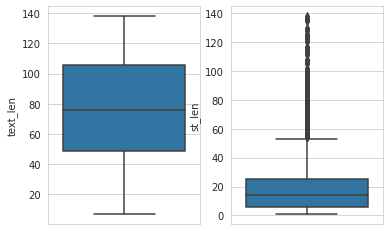

In [110]:
#Objective: To see the range of text length individually for all the sentiments
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_low_pos)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_low_pos)
plt.show()


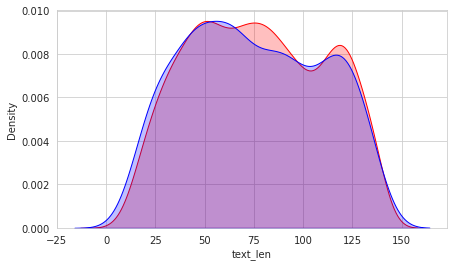

In [111]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_pos['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_pos['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


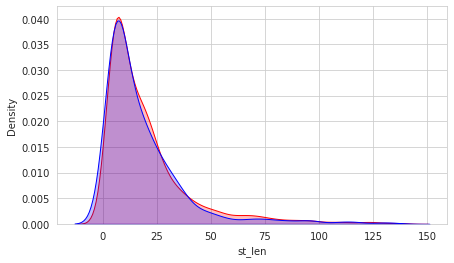

In [112]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_pos['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_pos['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [113]:
tr_med_pos = train_positive[(train_positive['jaccard'] > 0.4) & (train_positive['jaccard'] <= 0.75)]
print(len(tr_med_pos))
tr_med_pos.head()

1198


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
25,d98f04843f,I know! I`m totally excited,y excited,positive,"[0.0, 0.0, 0.0, 0.0, 1.0]",4.0,4.0,excited,0.50,27,9
48,388c6acb71,fireworks @ KBOOM concert... second best I`ve ...,second best,positive,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,best,0.50,103,11
79,f0ca2549ca,"lol, my current mp3 player is a brick. It woul...",It would be nice,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",10.0,11.0,be nice,0.50,78,16
84,b64034dd8e,everyone loves u sarah not just the tweeters! ...,everyone loves u sarah,positive,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,1.0,everyone loves,0.50,108,22
93,11370b4eed,its my birthday.....happy birthday to me!!!!,happy birthday to me!!!!,positive,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",3.0,5.0,birthday to me!!!!,0.75,44,24


In [114]:
print(tr_med_pos['text_len'].mean())
print(tr_med_pos['st_len'].mean())

69.7220367278798
17.146076794657763


In [115]:
ts_med_pos = test_positive[(test_positive['jaccard'] > 0.4) & (test_positive['jaccard'] <= 0.75)]
print(len(ts_med_pos))
ts_med_pos.head()

259


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
1,ee5b92dd36,TWEEEEEET! good morning twitterland! going to ...,good mo,positive,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,good,0.5,131,7
46,14d8e92a3e,_Attack thanks dude!,thanks,positive,"[0.0, 1.0, 0.0]",1.0,2.0,thanks dude!,0.5,20,6
60,cfc0dd0401,oh that was good cake,good,positive,"[0.0, 0.0, 0.0, 1.0, 0.0]",3.0,4.0,good cake,0.5,21,4
77,c021952637,right on! i`m 29 myself... i turn 30 in octob...,s awesome,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",17.0,18.0,awesome,0.5,91,9
79,ddbc804570,i KNOW! AHH! so fun!,so fun!,positive,"[0.0, 0.0, 0.0, 1.0, 1.0]",4.0,4.0,fun!,0.5,21,7


In [116]:
print(ts_med_pos['text_len'].mean())
print(ts_med_pos['st_len'].mean())

70.51351351351352
16.07335907335907


In [117]:
print('Difference between text length and selected text length is ',end='')
print(ts_med_pos['text_len'].mean()-ts_med_pos['st_len'].mean())

Difference between text length and selected text length is 54.440154440154444


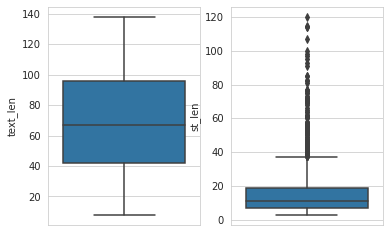

In [118]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_med_pos)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_med_pos)
plt.show()

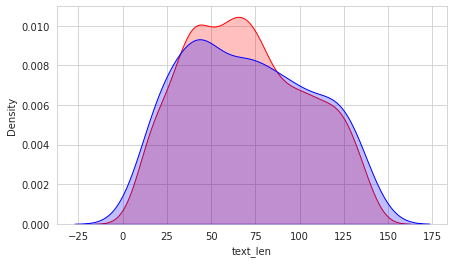

In [119]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_pos['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_pos['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


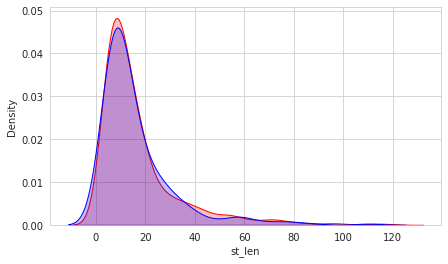

In [120]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_pos['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_pos['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [121]:
tr_high_pos = train_positive[(train_positive['jaccard'] > 0.75)]
print(len(tr_high_pos))
tr_high_pos.head()

2517


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
9,adbe4d8676,Nothing exciting from me tonight....got some n...,Happy,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.0,12.0,Happy,1.0,100,5
10,60da5f7f30,"ROFLMFAO!!!! You love us better, don`t you!",love,positive,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2.0,2.0,love,1.0,43,4
27,30ea165391,"great thanks hun, i did thr family thing this ...",great,positive,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,great,1.0,97,5
28,657d37972a,Thanks to my assignment im off to work today!,Thanks,positive,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,Thanks,1.0,45,6
41,734ab2cf0d,Bottle of reisling this time... My favorite!,favorite!,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",6.0,6.0,favorite!,1.0,44,9


In [122]:
print(tr_high_pos['text_len'].mean())
print(tr_high_pos['st_len'].mean())

61.64282876440207
15.90305919745729


In [123]:
ts_high_pos = test_positive[(test_positive['jaccard'] > 0.75)]
print(len(ts_high_pos))
ts_high_pos.head()

507


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
18,d9c047c4de,"Happy Mother`s Day, Moms!!! You are wonderful!...","Happy Mother`s Day, Moms!!! You are wonderful!...",positive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,11.0,"Happy Mother`s Day, Moms!!! You are wonderful!...",1.000000,64,64
23,b37664cb2a,goodnight everyone.,goodnight everyone.,positive,"[1.0, 1.0]",0.0,1.0,goodnight everyone.,1.000000,19,19
28,d153e50085,"__buckley Good for you mate, sadly I couldnt g...","Good for you mate, sadly I couldnt get pissed ...",positive,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,14.0,"__buckley Good for you mate, sadly I couldnt g...",0.933333,86,76
37,ad12342c25,recovering from being sick ... anyone want to ...,recovering from being sick,positive,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,3.0,recovering from being sick,1.000000,60,26
66,f60cc81508,relaxing fragrances are SOO IN! my latest love...,relaxing,positive,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,relaxing,1.000000,131,8


In [124]:
print(ts_high_pos['text_len'].mean())
print(ts_high_pos['st_len'].mean())

58.400394477317555
18.24852071005917


In [125]:
print('Difference between text length and selected text length is ',end='')
print(ts_high_pos['text_len'].mean()-ts_high_pos['st_len'].mean())

Difference between text length and selected text length is 40.15187376725838


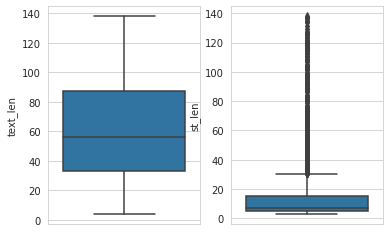

In [126]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_high_pos)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_high_pos)
plt.show()

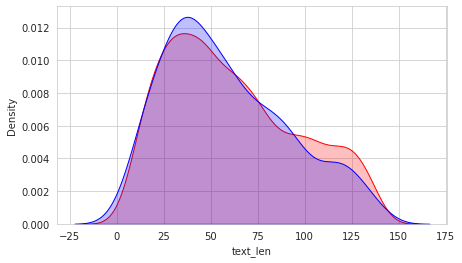

In [127]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_pos['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_pos['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


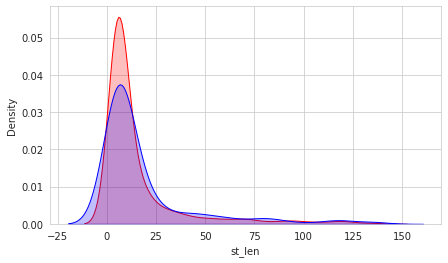

In [128]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_pos['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_pos['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


Analyzing negative texts

In [129]:
train_negative=train_copy[train_copy.sentiment=='negative']
train_negative.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0,hurts,1.000000
6,61e225fbd7,my new dress looks sort of...horrible http:/...,horrible,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0,my new dress looks sort of...horrible http://t...,0.000000
7,4c2b096989,half my class just called me retarded it hurt ...,it hurt for real,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,8.0,hurt,0.250000
12,9928207c77,Wide awake. Wishing I wasn`t. **** nightshift ...,Wide awake. Wishing I wasn`t. **** nightshift ...,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,18.0,Wide awake. Wishing I wasn`t. **** nightshift ...,0.947368
13,73a6c8c55e,My knee is killing me,My knee is killing me,negative,"[1.0, 1.0, 1.0, 1.0, 1.0]",3.0,4.0,killing me,0.400000


In [130]:
train_negative.shape

(6225, 9)

In [131]:
#train_negative.drop(columns=['encoded_text',],inplace=True)

In [132]:
test_negative=test_copy[test_copy.sentiment=='negative']
test_negative.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b...",0.357143
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0,Not any more.,1.000000
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,9.0,much stress,0.666667
5,1b9afa81bf,Waiting for 5:00 & having cramps,cramps,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",5.0,5.0,cramps,1.000000
10,ac58a7a9d5,cuz airlines are super lame.,lame.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0]",4.0,4.0,lame.,1.000000


In [133]:
test_negative.shape

(1556, 9)

In [134]:
#test_negative.drop(columns=['encoded_text',],inplace=True)

In [135]:
test_negative.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b...",0.357143
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0,Not any more.,1.000000


In [136]:
train_negative['text_len']=train_negative.apply(text_len,axis=1)
train_negative['st_len']=train_negative.apply(text_len1,axis=1)
test_negative['text_len']=test_negative.apply(text_len,axis=1)
test_negative['st_len']=test_negative.apply(text_len1,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [137]:
train_negative.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0,hurts,1.0,41,5
6,61e225fbd7,my new dress looks sort of...horrible http:/...,horrible,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0,my new dress looks sort of...horrible http://t...,0.0,64,8


In [138]:
print(train_negative['text_len'].mean())
print(train_negative['st_len'].mean())

70.3463453815261
19.927550200803214


In [139]:
test_negative.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b...",0.357143,89,21
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0,Not any more.,1.000000,13,13


In [140]:
tr_low_neg=train_negative[train_negative.jaccard<=0.4]
tr_low_neg.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
6,61e225fbd7,my new dress looks sort of...horrible http:/...,horrible,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0,my new dress looks sort of...horrible http://t...,0.000000,64,8
7,4c2b096989,half my class just called me retarded it hurt ...,it hurt for real,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,8.0,hurt,0.250000,54,16
13,73a6c8c55e,My knee is killing me,My knee is killing me,negative,"[1.0, 1.0, 1.0, 1.0, 1.0]",3.0,4.0,killing me,0.400000,21,21
17,bba7fc173b,crashing from my WI high...missing mayfield,missing,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5.0,crashing from my WI high...missing mayfield,0.000000,43,7
18,08a6d8a0da,_mejer I couldn`t remember what all the differ...,couldn`t remember wh,negative,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,19.0,I couldn`t remember what all the different cor...,0.117647,113,20


In [141]:
len(tr_low_neg[tr_low_neg.jaccard==0])

401

In [142]:
len(tr_low_neg)

2886

In [143]:
print(tr_low_neg['text_len'].mean())
print(tr_low_neg['st_len'].mean())

78.011088011088
19.441787941787943


In [144]:
ts_low_neg=test_negative[test_negative.jaccard<=0.4]
print(len(ts_low_neg))
ts_low_neg.head()

867


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
0,9f7dbce69d,"_d I can`t view anything, Gerald. Not only am ...","Not only am I banned,",negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",1.0,17.0,"I can`t view anything, Gerald. Not only am I b...",0.357143,89,21
14,dfd17c5926,Whooops... wrong smiley... it`s supposed to be...,wrong,negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,7.0,Whooops... wrong smiley... it`s supposed to be...,0.125000,51,5
17,39b286912b,not a lot!! im bored! My names Crissy BTW lol ...,not a lot!! im bored!,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",4.0,4.0,bored!,0.200000,62,21
22,ec66683c9f,Flap-a-taco was nice until the plebs came in.,Flap-a-taco was nice until the plebs came in.,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",2.0,2.0,nice,0.125000,45,45
25,c48674bca0,thers not many peole tweeting tonight... well ...,skint,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,18.0,thers not many peole tweeting tonight... well ...,0.055556,116,5


In [145]:
print(ts_low_neg['text_len'].mean())
print(ts_low_neg['st_len'].mean())

77.53748558246828
18.71280276816609


In [146]:
print('Difference between text length and selected text length is ',end='')
print(ts_low_neg['text_len'].mean()-ts_low_neg['st_len'].mean())

Difference between text length and selected text length is 58.82468281430219


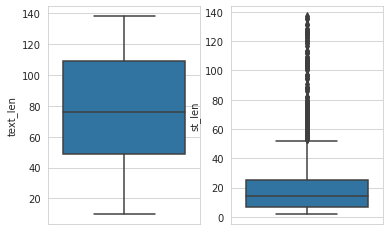

In [147]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_low_neg)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_low_neg)
plt.show()


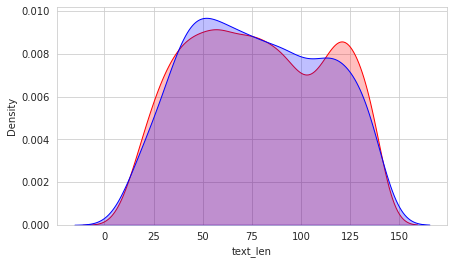

In [148]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_neg['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_neg['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


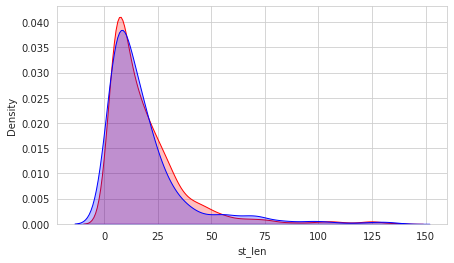

In [149]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_neg['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_neg['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [150]:
tr_med_neg = train_negative[(train_negative['jaccard'] > 0.4) & (train_negative['jaccard'] <= 0.75)]
print(len(tr_med_neg))
tr_med_neg.head()

1089


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
14,00248197c5,Im in so deep its disgusting. I would even tak...,s disgusting.,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,disgusting.,0.500000,106,13
33,0e28857f4b,http://twitpic.com/675t7 - Square B - she is s...,she is sad,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",6.0,7.0,is sad,0.666667,136,10
43,d4c4ea2da8,Where`s poss i miss him,i miss,negative,"[0.0, 0.0, 1.0, 1.0, 0.0]",3.0,3.0,miss,0.500000,26,6
47,d3344f58a6,Trying to figure out this thing...it`s not goi...,it`s not going well,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",6.0,8.0,not going well,0.750000,53,19
51,c9ed90d81c,"_A_R_A I was wondering where you were, how com...",not nice,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.0,22.0,nice,0.500000,129,8


In [151]:
print(tr_med_neg['text_len'].mean())
print(tr_med_neg['st_len'].mean())

68.21763085399449
20.882460973370065


In [152]:
ts_med_neg = test_negative[(test_negative['jaccard'] > 0.4) & (test_negative['jaccard'] <= 0.75)]
print(len(ts_med_neg))
ts_med_neg.head()

261


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
4,1fcc024ec4,"LMOA! i just quit one of mine, too much stress",too much stress,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",8.0,9.0,much stress,0.666667,46,15
12,3ac5c17dda,This class is really long and I`m really getti...,This class is really long,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,9.0,This class is really long and I`m really getti...,0.555556,55,25
87,5250e0d4ba,Having a hectic day travelling from PJ to UNIT...,hectic day,negative,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,2.0,hectic,0.500000,87,10
104,77c8d92adb,listens to MSI and bakes banana bread. How wei...,How weird is she? Remarkably not so much anymore.,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.0,16.0,listens to MSI and bakes banana bread. How wei...,0.562500,88,49
124,4e1fc4b289,"`erocka the ruler` i called you, but i see i g...",i see i gets the no love whats up with that,negative,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.0,17.0,"`erocka the ruler` i called you, but i see i g...",0.562500,83,45


In [153]:
print(ts_med_neg['text_len'].mean())
print(ts_med_neg['st_len'].mean())

62.440613026819925
20.436781609195403


In [154]:
print('Difference between text length and selected text length is ',end='')
print(ts_med_neg['text_len'].mean()-ts_med_neg['st_len'].mean())

Difference between text length and selected text length is 42.003831417624525


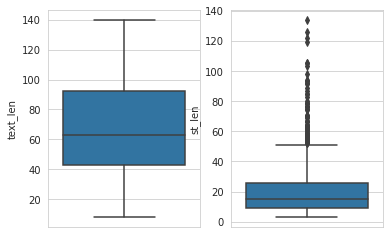

In [155]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_med_neg)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_med_neg)
plt.show()

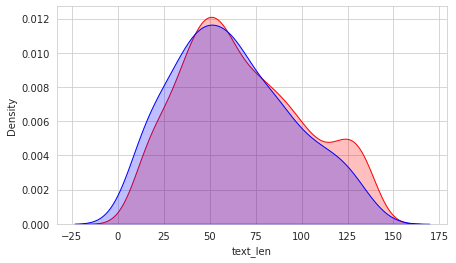

In [156]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_neg['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_neg['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


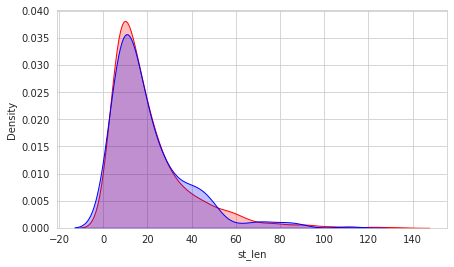

In [157]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_neg['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_neg['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [158]:
tr_high_neg = train_negative[(train_negative['jaccard'] > 0.75)]
print(len(tr_high_neg))
tr_high_neg.head()

2250


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
0,bc4f254bdd,"has burnt my hand on the cooker, it hurts",hurts,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",8.0,8.0,hurts,1.000000,41,5
12,9928207c77,Wide awake. Wishing I wasn`t. **** nightshift ...,Wide awake. Wishing I wasn`t. **** nightshift ...,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,18.0,Wide awake. Wishing I wasn`t. **** nightshift ...,0.947368,109,105
26,5399d6cddd,Where art thou ? I miss you!,I miss you!,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",4.0,6.0,I miss you!,1.000000,28,11
40,29a9e34b8f,Will miss my baby for 2 days,Will miss my baby for 2 days,negative,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,6.0,miss my baby for 2 days,0.857143,28,28
42,050721252d,Doubtful! It`s going to be on 24/2!,Doubtful!,negative,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,Doubtful!,1.000000,35,9


In [159]:
print(tr_high_neg['text_len'].mean())
print(tr_high_neg['st_len'].mean())

61.54533333333333
20.088444444444445


In [160]:
ts_high_neg = test_negative[(test_negative['jaccard'] > 0.75)]
print(len(ts_high_neg))
ts_high_neg.head()

428


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
3,4c8908e55c,Not any more.,Not any more.,negative,"[1.0, 1.0, 1.0]",0.0,2.0,Not any more.,1.0,13,13
5,1b9afa81bf,Waiting for 5:00 & having cramps,cramps,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",5.0,5.0,cramps,1.0,32,6
10,ac58a7a9d5,cuz airlines are super lame.,lame.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0]",4.0,4.0,lame.,1.0,28,5
19,e591a91118,it wont work for me,it wont work for me,negative,"[1.0, 1.0, 1.0, 1.0, 1.0]",0.0,4.0,it wont work for me,1.0,19,19
43,ac4bbd801f,"yeah, it`s gonna be rubbish!",rubbish!,negative,"[0.0, 0.0, 0.0, 0.0, 1.0]",4.0,4.0,rubbish!,1.0,28,8


In [161]:
print(ts_high_neg['text_len'].mean())
print(ts_high_neg['st_len'].mean())

56.808411214953274
22.712616822429908


In [162]:
print('Difference between text length and selected text length is ',end='')
print(ts_high_neg['text_len'].mean()-ts_high_neg['st_len'].mean())

Difference between text length and selected text length is 34.095794392523366


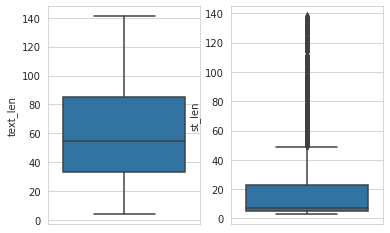

In [163]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_high_neg)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_high_neg)
plt.show()

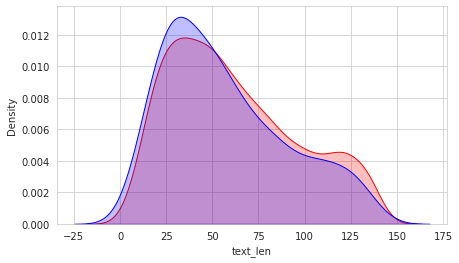

In [164]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_neg['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_neg['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


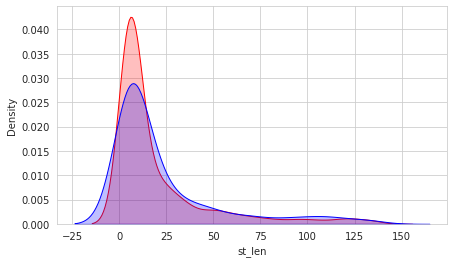

In [165]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_neg['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_neg['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


Analyzing neutral texts

In [166]:
train_neutral=train_copy[train_copy.sentiment=='neutral']
train_neutral.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0,I`m going to try & get some sleep. I got work ...,0.961538
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,losing,1.000000
4,dd1b429fc1,i`m not ready for tomorrow`s competition!,i`m not ready for tomorrow`s competition!,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,5.0,i`m not ready for tomorrow`s competition!,1.000000
5,18910017a3,Josette....where are you?? I looked across t...,Josette....where are you?? I looked across t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,14.0,Josette....where are you?? I looked across the...,1.000000
8,d45ad63346,YoYo door nazis refused me entry on account of...,YoYo door nazis refused me entry on account of...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,23.0,YoYo door nazis refused me entry on account of...,1.000000


In [167]:
train_neutral.shape

(8894, 9)

In [168]:
#train_neutral.drop(columns=['encoded_text'],inplace=True)

In [169]:
test_neutral=test_copy[test_copy.sentiment=='neutral']
test_neutral.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0,okay i need to find another way then lolz,1.0000
6,f19b2cd94a,"Ugh, I feel like ****-- gonna call out of my c...","Ugh, I feel like ****-- gonna call out of my c...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,17.0,"Ugh, I feel like ****-- gonna call out of my c...",1.0000
7,bbd9c7c9c5,I`m so sorry to hear your bad news. I will se...,I`m so sorry to hear your bad news. I will se...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,22.0,I`m so sorry to hear your bad news. I will sen...,1.0000
9,6ccec768e2,"definitely, or even just 'i`ll call you', they...","definitely, or even just 'i`ll call you', they...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,15.0,"definitely, or even just 'i`ll call you', they...",0.8125
11,317e271cf3,Guitar lessons tomorrow. ( I have to wake up e...,Guitar lessons tomorrow. ( I have to wake up e...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,10.0,Guitar lessons tomorrow. ( I have to wake up e...,1.0000


In [170]:
test_neutral.shape

(2224, 9)

In [171]:
#test_neutral.drop(columns=['encoded_text',],inplace=True)

In [172]:
test_neutral.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0,okay i need to find another way then lolz,1.0
6,f19b2cd94a,"Ugh, I feel like ****-- gonna call out of my c...","Ugh, I feel like ****-- gonna call out of my c...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,17.0,"Ugh, I feel like ****-- gonna call out of my c...",1.0


In [173]:
train_neutral['text_len']=train_neutral.apply(text_len,axis=1)
train_neutral['st_len']=train_neutral.apply(text_len1,axis=1)
test_neutral['text_len']=test_neutral.apply(text_len,axis=1)
test_neutral['st_len']=test_neutral.apply(text_len1,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [174]:
train_neutral.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0,I`m going to try & get some sleep. I got work ...,0.961538,137,137
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,losing,1.000000,79,6


In [175]:
print(train_neutral['text_len'].mean())
print(train_neutral['st_len'].mean())

64.86979986507758
62.86215426129975


In [176]:
test_neutral.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0,okay i need to find another way then lolz,1.0,41,41
6,f19b2cd94a,"Ugh, I feel like ****-- gonna call out of my c...","Ugh, I feel like ****-- gonna call out of my c...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,17.0,"Ugh, I feel like ****-- gonna call out of my c...",1.0,90,90


In [177]:
tr_low_neu=train_neutral[train_neutral.jaccard<=0.4]
tr_low_neu.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
34,ca9df3b99e,There is a sadness in the air at school but I...,There is a sadness in the air at school but I...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,3.0,There is a sadness,0.285714,63,63
45,1848ee74fe,-- yeahhh u wasnt thereeeeeeeeeee,#NAME?,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,4.0,-- yeahhh u wasnt thereeeeeeeeeee,0.000000,33,6
87,dd2b941fef,[stapler haiku] Whar a Night! Woo Hoo! Yeah! /...,Whar a Night! Woo Hoo! Yeah! / A beautiful nig...,neutral,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",8.0,9.0,/ A,0.142857,99,83
124,8658e3fed2,"_GreenWizard ah ha! Cool, will look into that ...","_GreenWizard ah ha! Cool, will look into that ...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",18.0,18.0,Thanks,0.052632,102,102
130,7b1cba35d6,i wud do but im at work srry ****,i wud do but im at work srry,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]",7.0,8.0,srry ****,0.111111,35,30


In [178]:
len(tr_low_neu[tr_low_neu.jaccard==0])

23

In [179]:
len(tr_low_neu)

723

In [180]:
print(tr_low_neu['text_len'].mean())
print(tr_low_neu['st_len'].mean())

78.09958506224066
70.18395573997233


In [181]:
ts_low_neu=test_neutral[test_neutral.jaccard<=0.4]
print(len(ts_low_neu))
ts_low_neu.head()

255


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
42,aa984895f6,"Oh man, that`s rough. Sounded like the weeken...",that`s rough. Sounded like the weekend went w...,neutral,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,3.0,"Oh man, that`s rough.",0.200000,74,50
96,adede39756,you look smashing darling is trent reznor rea...,you look smashing darling is trent reznor rea...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,2.0,you look smashing,0.150000,114,114
110,9bb6a384bd,had a good day but im now skint again,had a good day but im now skint again,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",2.0,2.0,good,0.111111,37,37
111,188d3cea0c,to cold for the beach sucky.,to cold for the beach sucky.,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",5.0,5.0,sucky.,0.166667,29,29
112,aa120f1755,http://naturalismo.files.wordpress.com/2008/01...,http://naturalismo.files.wordpress.com/2008/01...,neutral,"[1.0, 1.0, 1.0]",2.0,4.0,hero,0.333333,68,68


In [182]:
print(ts_low_neu['text_len'].mean())
print(ts_low_neu['st_len'].mean())

73.70980392156862
66.26666666666667


In [183]:
print('Difference between text length and selected text length is ',end='')
print(ts_low_neu['text_len'].mean()-ts_low_neu['st_len'].mean())

Difference between text length and selected text length is 7.443137254901956


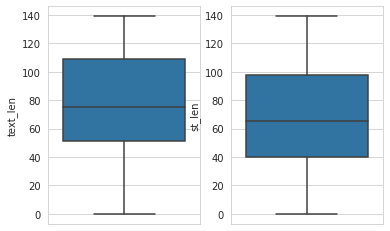

In [184]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_low_neu)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_low_neu)
plt.show()


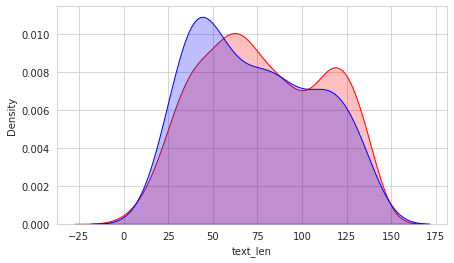

In [185]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_neu['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_neu['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


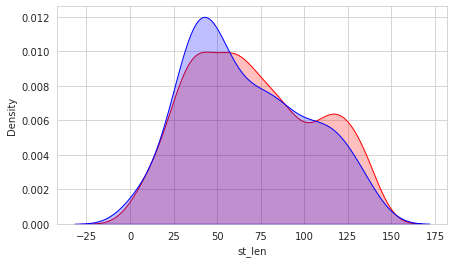

In [186]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_low_neu['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_low_neu['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [187]:
tr_med_neu = train_neutral[(train_neutral['jaccard'] > 0.4) & (train_neutral['jaccard'] <= 0.75)]
print(len(tr_med_neu))
tr_med_neu.head()

274


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
140,f87ffde1b0,_mueller yes i love it its just a little bit ...,"yes i love it its just a little bit complicated,",neutral,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,21.0,yes i love it its just a little bit complicate...,0.555556,106,49
252,a39a139223,just joined Twitter... Hiya world!,just joined Twitter... Hiya world,neutral,"[1.0, 1.0, 1.0, 1.0, 0.0]",0.0,4.0,just joined Twitter... Hiya world!,0.666667,38,37
255,511eff412b,Crazy Legs is peepin _parks at the pool hahaha...,"at the pool hahaha She likes graf writers, not...",neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,16.0,Crazy Legs is peepin _parks at the pool hahaha...,0.687500,88,60
285,7a3f00a1fe,Tapit:E446WWHLLYAR TK3H6694PRMP 9R46TAHXEFKT p...,please @ reply me if you win! Thanks!,neutral,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,12.0,Tapit:E446WWHLLYAR TK3H6694PRMP 9R46TAHXEFKT p...,0.727273,82,37
468,f98db090f7,This is a status update to twitter from ICE T...,This is a status update to twitter from ICE T...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,15.0,This is a status update to twitter from ICE Ti...,0.625000,85,55


In [188]:
print(tr_med_neu['text_len'].mean())
print(tr_med_neu['st_len'].mean())

70.52189781021897
54.083941605839414


In [189]:
ts_med_neu = test_neutral[(test_neutral['jaccard'] > 0.4) & (test_neutral['jaccard'] <= 0.75)]
print(len(ts_med_neu))
ts_med_neu.head()

80


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
80,3c79a762ad,Going to Hong Kong tonight. Hope I can sleep i...,Going to Hong Kong tonight. Hope I can sleep i...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",5.0,20.0,Hope I can sleep in the airplane. Worth case I...,0.736842,105,105
216,e13be6452c,the #liesgirlstell and #liesboystell threads s...,the #liesgirlstell and #liesboystell threads s...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",11.0,22.0,"are screwed up and struggle to have real, hone...",0.526316,136,136
374,2224270b7e,watching 'slice of life' (laughing at the song...,watching 'slice of life' (laughing at the song...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",4.0,12.0,(laughing at the songgg) and then going to sleep,0.692308,73,73
555,7fc2b79810,Hope you get your car today Hate anything th...,Hope you get your car today Hate anything th...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",6.0,14.0,Hate anything that stops me from my work ;),0.533333,73,70
645,8891f2aaa6,I`m going to be doing the FAFSA form today. I...,I`m going to be doing the FAFSA form today. I...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10.0,26.0,hope to help out in the Ann Arbor / Detroit Me...,0.680000,134,134


In [190]:
print(ts_med_neu['text_len'].mean())
print(ts_med_neu['st_len'].mean())

73.9375
55.45


In [191]:
print('Difference between text length and selected text length is ',end='')
print(ts_med_neu['text_len'].mean()-ts_med_neu['st_len'].mean())

Difference between text length and selected text length is 18.487499999999997


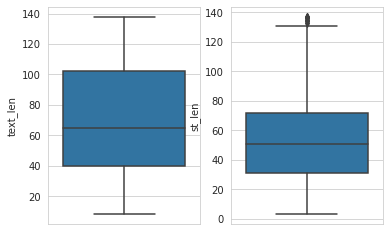

In [192]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_med_neu)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_med_neu)
plt.show()

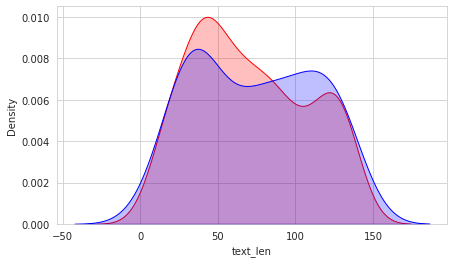

In [193]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_neu['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_neu['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


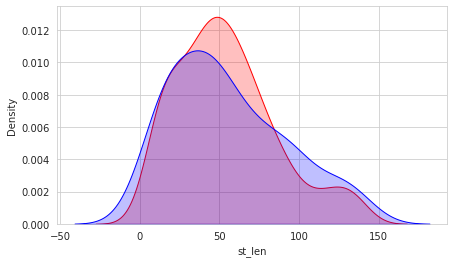

In [194]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_med_neu['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_med_neu['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


In [195]:
tr_high_neu = train_neutral[(train_neutral['jaccard'] > 0.75)]
print(len(tr_high_neu))
tr_high_neu.head()

7897


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
1,8537872198,I`m going to try & get some sleep. I got work ...,I`m going to try & get some sleep. I got work ...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,26.0,I`m going to try & get some sleep. I got work ...,0.961538,137,137
3,f782648201,I am the queen of losing things. Important thi...,losing,neutral,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5.0,5.0,losing,1.000000,79,6
4,dd1b429fc1,i`m not ready for tomorrow`s competition!,i`m not ready for tomorrow`s competition!,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,5.0,i`m not ready for tomorrow`s competition!,1.000000,41,41
5,18910017a3,Josette....where are you?? I looked across t...,Josette....where are you?? I looked across t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,14.0,Josette....where are you?? I looked across the...,1.000000,87,87
8,d45ad63346,YoYo door nazis refused me entry on account of...,YoYo door nazis refused me entry on account of...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,23.0,YoYo door nazis refused me entry on account of...,1.000000,123,123


In [196]:
print(tr_high_neu['text_len'].mean())
print(tr_high_neu['st_len'].mean())

63.46245409649234
62.49639103457009


In [197]:
ts_high_neu = test_neutral[(test_neutral['jaccard'] > 0.75)]
print(len(ts_high_neu))
ts_high_neu.head()

1889


,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard,text_len,st_len
2,c8f88c6bc2,okay i need to find another way then lolz,okay i need to find another way then lolz,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.0,8.0,okay i need to find another way then lolz,1.0000,41,41
6,f19b2cd94a,"Ugh, I feel like ****-- gonna call out of my c...","Ugh, I feel like ****-- gonna call out of my c...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,17.0,"Ugh, I feel like ****-- gonna call out of my c...",1.0000,90,90
7,bbd9c7c9c5,I`m so sorry to hear your bad news. I will se...,I`m so sorry to hear your bad news. I will se...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,22.0,I`m so sorry to hear your bad news. I will sen...,1.0000,107,107
9,6ccec768e2,"definitely, or even just 'i`ll call you', they...","definitely, or even just 'i`ll call you', they...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,15.0,"definitely, or even just 'i`ll call you', they...",0.8125,77,71
11,317e271cf3,Guitar lessons tomorrow. ( I have to wake up e...,Guitar lessons tomorrow. ( I have to wake up e...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,10.0,Guitar lessons tomorrow. ( I have to wake up e...,1.0000,57,57


In [198]:
print(ts_high_neu['text_len'].mean())
print(ts_high_neu['st_len'].mean())

62.603493912122815
61.844891476971945


In [199]:
print('Difference between text length and selected text length is ',end='')
print(ts_high_neu['text_len'].mean()-ts_high_neu['st_len'].mean())

Difference between text length and selected text length is 0.7586024351508698


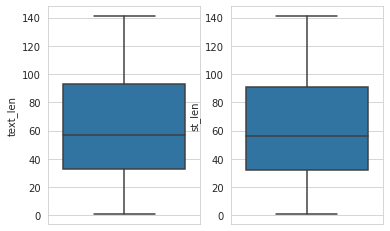

In [200]:
#Objective: To see the range of text length individually for all the sentiments
sns.set_style(style="whitegrid")
plt.subplot(121)
sns.boxplot(y='text_len', data=tr_high_neu)
plt.subplot(122)
sns.boxplot(y='st_len',data=tr_high_neu)
plt.show()

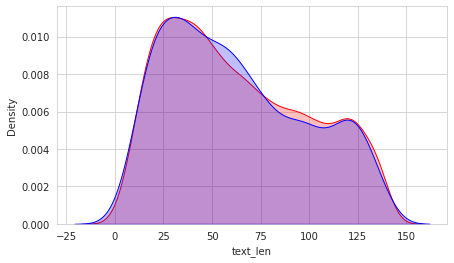

In [201]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_neu['text_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_neu['text_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


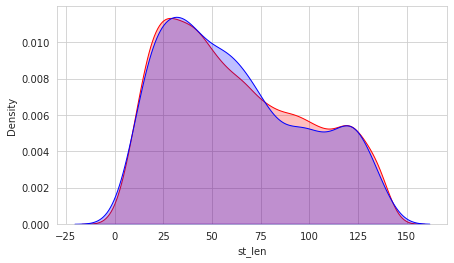

In [202]:
#Objective: To see the distribution of length of the texts
plt.figure(figsize=(7,4))
sns.kdeplot(tr_high_neu['st_len'], color='r', shade=True, Label='Train text length with low jaccard scores')
sns.kdeplot(ts_high_neu['st_len'], color='b', shade=True, Label='Test text length with low jaccard scores')


Clearly, the model is struggling for tweets where the length of the text is long and the selected text is small.